In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score


In [5]:
# Loading Dataset
df = pd.read_csv("Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


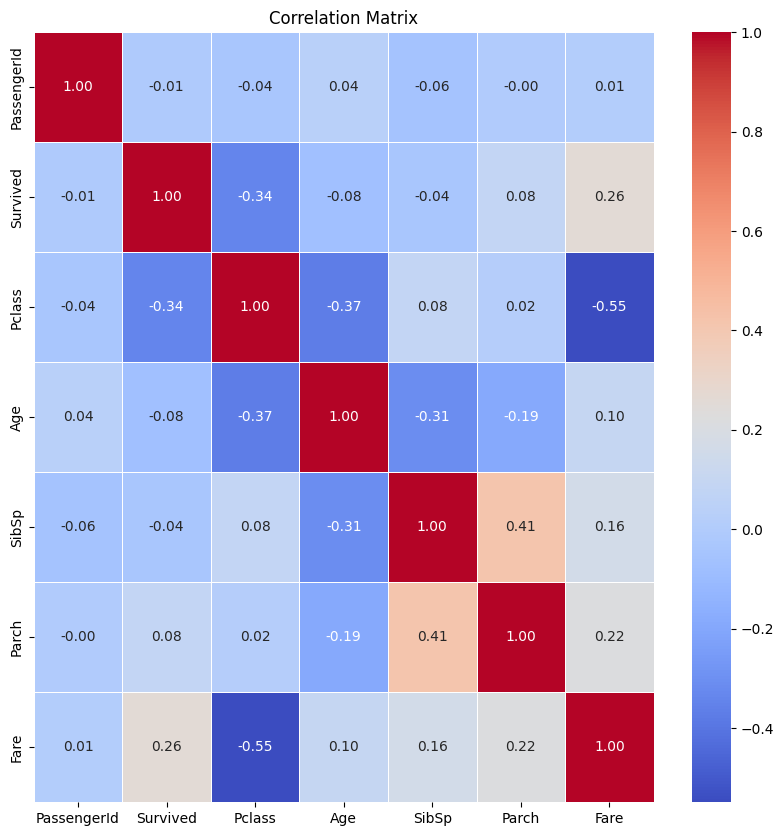

In [7]:
# Plotting Correlation
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [8]:
df2 = pd.read_csv("Titanic-Dataset.csv")

df2 = df2.dropna(subset=['Age', 'Fare'])

fig = px.scatter(
    df2,
    x='Age',
    y='Fare',
    color='Survived',
    title='Scatter Plot of Titanic Survivors by Age and Fare',
    labels={'Survived': 'Survival Status', 'Age': 'Age', 'Fare': 'Fare'},
    color_continuous_scale='Viridis' if df['Survived'].nunique() > 2 else None
)

fig.show()

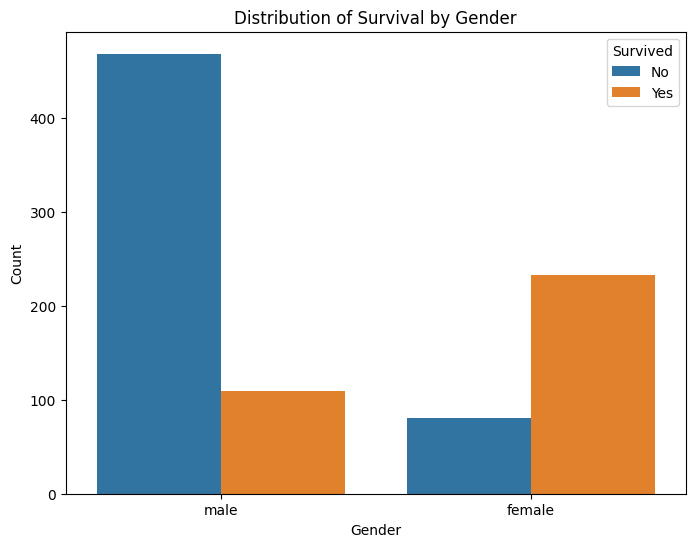

In [9]:
df3 = pd.read_csv('Titanic-Dataset.csv')

df3 = df.dropna(subset=['Survived', 'Sex'])

plt.figure(figsize=(8, 6))

sns.countplot(data=df3, x='Sex', hue='Survived')

plt.title('Distribution of Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()


<ipython-input-10-b25bfc3709c7>:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-10-b25bfc3709c7>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




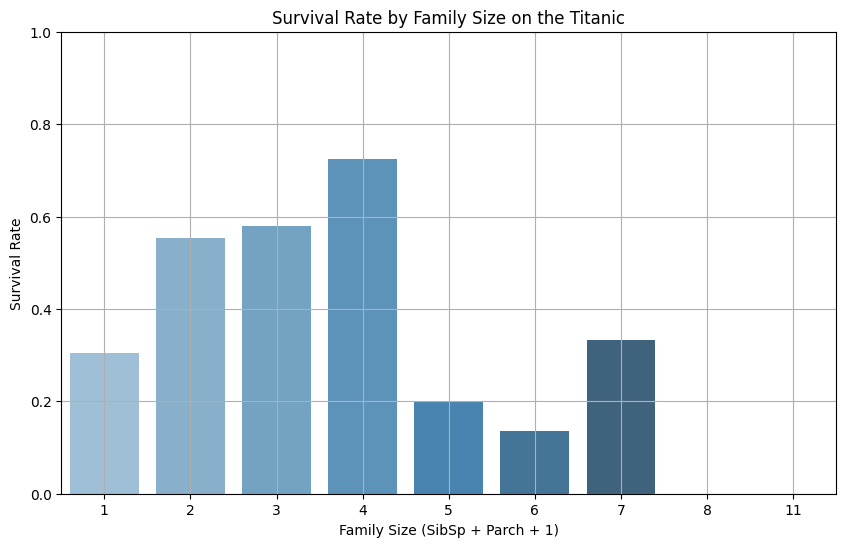

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [10]:
# Drop rows where 'Survived', 'SibSp', or 'Parch' is missing
df = df.dropna(subset=['Survived', 'SibSp', 'Parch'])

# Step 1: Calculate FamilySize = SibSp + Parch + 1
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Step 2: Calculate survival rate for each family size
survival_by_family_size = df.groupby('FamilySize')['Survived'].mean().reset_index()

# Step 3: Plot the survival rate
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=survival_by_family_size, palette='Blues_d', ci=None)

# Customize the plot
plt.title('Survival Rate by Family Size on the Titanic')
plt.xlabel('Family Size (SibSp + Parch + 1)')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(True)

# Show the plot
plt.show()

# Optional: Print raw values
print(survival_by_family_size)


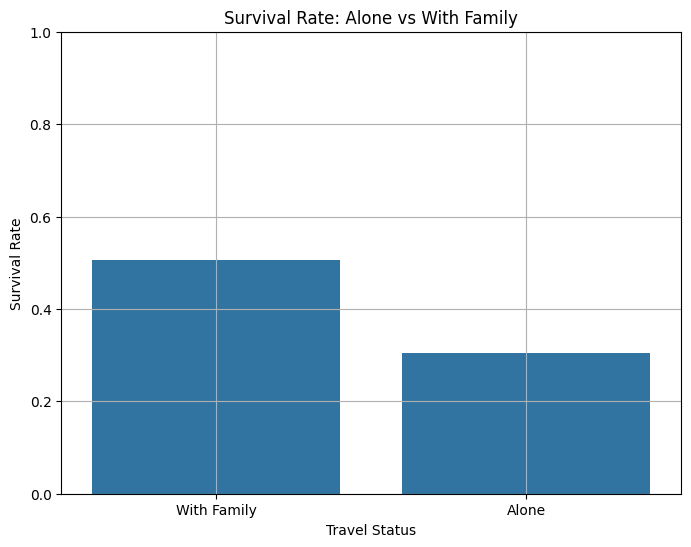

Survival Rate based on travel status:
        Status  Survived
0  With Family  0.505650
1        Alone  0.303538


In [11]:
df = pd.read_csv("Titanic-Dataset.csv")

df = df.dropna(subset=['Survived', 'SibSp', 'Parch'])

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df['IsAlone'] = df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

survival_by_alone = df.groupby('IsAlone')['Survived'].mean().reset_index()
survival_by_alone['Status'] = survival_by_alone['IsAlone'].map({0: 'With Family', 1: 'Alone'})

plt.figure(figsize=(8, 6))
sns.barplot(x='Status', y='Survived', data=survival_by_alone, legend=False, errorbar=None)

plt.title('Survival Rate: Alone vs With Family')
plt.xlabel('Travel Status')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(True)

plt.show()

print("Survival Rate based on travel status:")
print(survival_by_alone[['Status', 'Survived']])


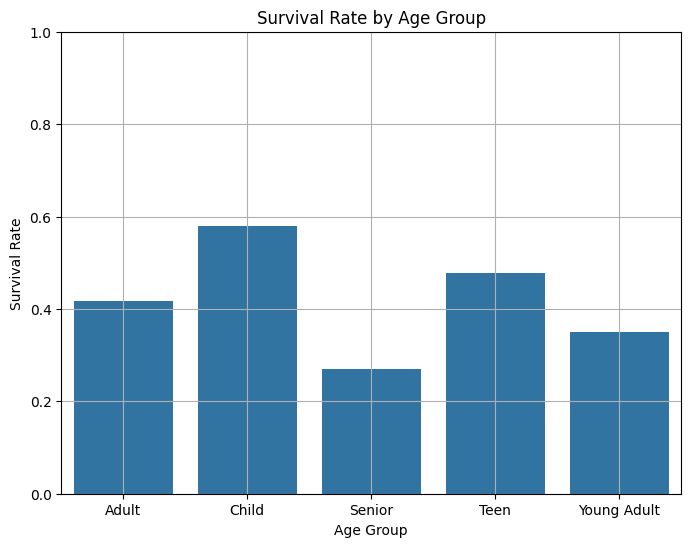

Survival Rate by Age Group:

      AgeGroup  Survived
0        Adult  0.417763
1        Child  0.579710
2       Senior  0.269231
3         Teen  0.477273
4  Young Adult  0.350554


In [12]:
df = pd.read_csv('Titanic-Dataset.csv')

# Drop rows with missing values in 'Age' or 'Survived'
df = df.dropna(subset=['Age', 'Survived'])

# Function to classify passengers into age groups
def get_age_group(age):
    if age <= 12:
        return 'Child'
    elif age <= 17:
        return 'Teen'
    elif age <= 29:
        return 'Young Adult'
    elif age <= 59:
        return 'Adult'
    else:
        return 'Senior'

# Apply the function to create a new column
df['AgeGroup'] = df['Age'].apply(get_age_group)

# Calculate survival rate by age group
survival_by_agegroup = df.groupby('AgeGroup')['Survived'].mean().reset_index()

# Plot the survival rate by age group
plt.figure(figsize=(8, 6))
sns.barplot(x='AgeGroup', y='Survived', data=survival_by_agegroup, legend=False, errorbar=None)

# Customize the plot
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(True)

# Show the plot
plt.show()

# Print numerical survival rates
print("Survival Rate by Age Group:\n")
print(survival_by_agegroup)


In [13]:
# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Step 1: Count and ratio of missing values
missing_count = df.isnull().sum()
missing_ratio = (missing_count / len(df)) * 100

# Combine into a single table for clarity
missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Ratio (%)': missing_ratio
})

# Filter only columns with missing data
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]

# Print missing value summary
print("Missing Data Summary:\n")
print(missing_summary)


Missing Data Summary:

          Missing Count  Missing Ratio (%)
Age                 177          19.865320
Cabin               687          77.104377
Embarked              2           0.224467


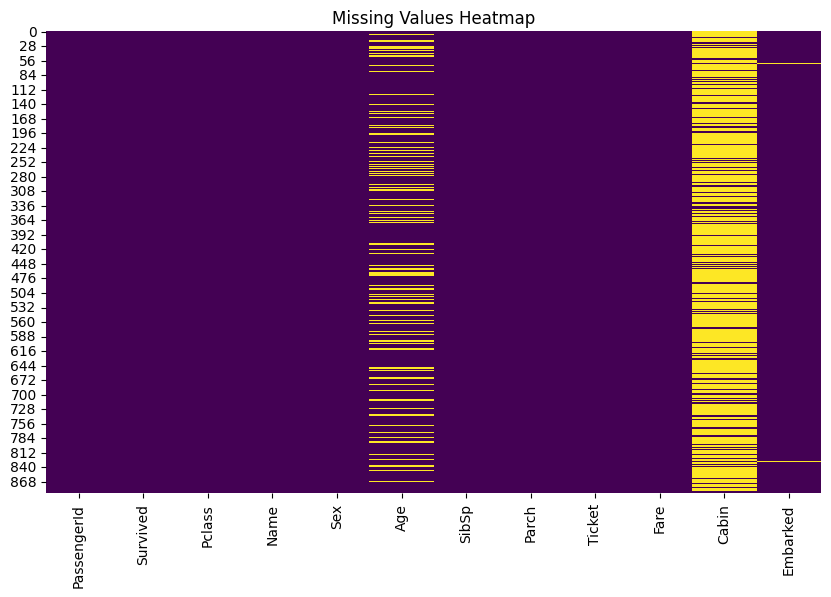

In [14]:
# Visualize missing data heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [15]:
# Load dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Show original shape before cleaning
print("Original data shape:", df.shape)

# 1. Mean imputation for 'Age'
df['Age'] = df['Age'].fillna(df['Age'].mean())
print("Filled missing 'Age' values with mean.")

# 2. Drop 'Cabin' column entirely
df.drop(columns=['Cabin'], inplace=True)
print("Dropped 'Cabin' column due to high missing rate.")

# 3. Mode imputation for 'Embarked'
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
print("Filled missing 'Embarked' values with mode.")

# 4. Median imputation for 'Fare'
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
print("Filled missing 'Fare' values with median.")

# Check again for missing values to confirm all have been handled
missing_after = df.isnull().sum()
print("\nRemaining missing values (should all be 0):\n", missing_after[missing_after > 0])

# Optional: Display final shape
print("\nCleaned data shape:", df.shape)


Original data shape: (891, 12)
Filled missing 'Age' values with mean.
Dropped 'Cabin' column due to high missing rate.
Filled missing 'Embarked' values with mode.
Filled missing 'Fare' values with median.

Remaining missing values (should all be 0):
 Series([], dtype: int64)

Cleaned data shape: (891, 11)


In [27]:
# Load dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Preprocessing
df = df.drop(columns=['Cabin', 'Name', 'Ticket'])  # drop irrelevant columns
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Convert categorical variables to dummies
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Define features and target
X = df.drop(columns=['Survived', 'PassengerId'])
y = df['Survived']

# Standardize features for regularization methods
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------------
# 1. Feature Selection via LassoCV
# ----------------------------
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, y)

# Get non-zero features
lasso_selected = X.columns[lasso.coef_ != 0]
print(" Features selected by Lasso Regression:")
print(list(lasso_selected))

# ----------------------------
# 2. Feature Selection via Recursive Feature Elimination (RFE)
# ----------------------------
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=log_reg, n_features_to_select=5)
rfe.fit(X_scaled, y)

rfe_selected = X.columns[rfe.support_]
print("\n Features selected by Recursive Feature Elimination:")
print(list(rfe_selected))

# ----------------------------
# Compare and find intersection
# ----------------------------
common_features = set(lasso_selected) & set(rfe_selected)
print("\n Common features selected by both methods:")
print(list(common_features))


 Features selected by Lasso Regression:
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_S']

 Features selected by Recursive Feature Elimination:
['Pclass', 'Age', 'SibSp', 'Sex_male', 'Embarked_S']

 Common features selected by both methods:
['Embarked_S', 'Sex_male', 'Pclass', 'SibSp', 'Age']


In [17]:
selected_features = ['Sex_male', 'Embarked_S', 'SibSp', 'Age', 'Pclass']

# Create new feature matrix using only selected features
X_selected = df[selected_features]
y = df['Survived']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)# Evaluate accuracy on train and test sets
train_accuracy = model.score(X_train_scaled, y_train)
test_accuracy = model.score(X_test_scaled, y_test)

# Print results
print("Logistic Regression with Selected Features")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy:  {test_accuracy:.4f}")

Logistic Regression with Selected Features
Training Accuracy: 0.9508
Testing Accuracy:  0.9665


Text(0.5, 1.0, 'Confusion Matrix')

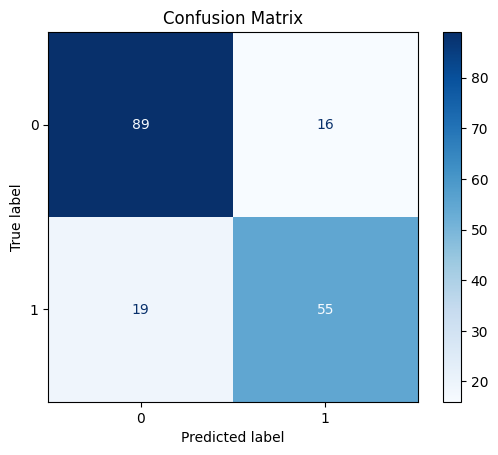

In [19]:
# Predictions
y_pred = model.predict(X_test_scaled)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
disp.ax_.set_title('Confusion Matrix')

In [20]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Precision
prec = precision_score(y_test, y_pred)
print(f"Precision: {prec:.4f}")

# Recall
rec = recall_score(y_test, y_pred)
print(f"Recall: {rec:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# ROC AUC (requires predicted probabilities)
y_probs = model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Full Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8045
Precision: 0.7746
Recall: 0.7432
F1 Score: 0.7586
ROC AUC Score: 0.8805

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



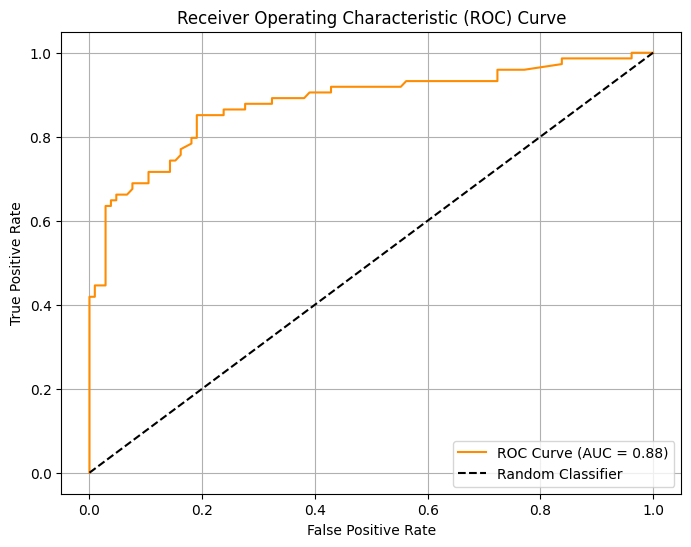

In [21]:
# Get predicted probabilities for the positive class (class 1)
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# Calculate False Positive Rate, True Positive Rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC score
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [29]:
# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Basic preprocessing
df = df.drop(columns=['Cabin', 'Name', 'Ticket'])  # Drop irrelevant columns
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Create 3-class target based on Fare (as a proxy for survival chance)
def categorize_survival_chance(row):
    if row['Fare'] < 10:
        return 0  # Low chance
    elif row['Fare'] < 50:
        return 1  # Medium chance
    else:
        return 2  # High chance

df['SurvivalChance'] = df.apply(categorize_survival_chance, axis=1)

# Check class distribution
print("Class distribution:")
print(df['SurvivalChance'].value_counts())

# Define features and target
X = df.drop(columns=['Survived', 'PassengerId', 'SurvivalChance'])
y = df['SurvivalChance']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------- Multinomial Logistic Regression --------
model_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model_multi.fit(X_train_scaled, y_train)
y_pred_multi = model_multi.predict(X_test_scaled)
acc_multi = accuracy_score(y_test, y_pred_multi)

# -------- One-vs-Rest Logistic Regression --------
model_ovr = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
model_ovr.fit(X_train_scaled, y_train)
y_pred_ovr = model_ovr.predict(X_test_scaled)
acc_ovr = accuracy_score(y_test, y_pred_ovr)

# -------- Results --------
print("\n Accuracy - Multinomial Logistic Regression:", round(acc_multi, 4))
print(" Accuracy - One-vs-Rest Logistic Regression:", round(acc_ovr, 4))


Class distribution:
SurvivalChance
1    394
0    336
2    161
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.




 Accuracy - Multinomial Logistic Regression: 0.9665
 Accuracy - One-vs-Rest Logistic Regression: 0.9497


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.



In [23]:
feature_names = X_selected.columns
coefficients = model.coef_[0]

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds Ratio': np.exp(coefficients)
})

coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

print(" Logistic Regression Coefficients and Odds Ratios:")
print(coef_df)


 Logistic Regression Coefficients and Odds Ratios:
      Feature  Coefficient  Odds Ratio
1  Embarked_S    -0.197128    0.821085
2       SibSp    -0.363105    0.695513
3         Age    -0.404324    0.667428
4      Pclass    -0.858821    0.423661
0    Sex_male    -1.257098    0.284478


In [26]:
# Create coefficient DataFrame (transpose to get features in rows)
multi_coef_df = pd.DataFrame(
    model_multi.coef_.T,
    columns=['Class 0', 'Class 1', 'Class 2'],
    index=X.columns
)

# Compute odds ratios by exponentiating coefficients
multi_coef_df['Odds Ratio (Class 0)'] = np.exp(multi_coef_df['Class 0'])
multi_coef_df['Odds Ratio (Class 1)'] = np.exp(multi_coef_df['Class 1'])
multi_coef_df['Odds Ratio (Class 2)'] = np.exp(multi_coef_df['Class 2'])

# Display the table
print("Multinomial Logistic Regression Coefficients and Odds Ratios:")
display(multi_coef_df)


Multinomial Logistic Regression Coefficients and Odds Ratios:


,Class 0,Class 1,Class 2,Odds Ratio (Class 0),Odds Ratio (Class 1),Odds Ratio (Class 2)
Pclass,1.850708,-0.736453,-1.114255,6.364322,0.478809,0.328160
Age,-0.044447,-0.064770,0.109217,0.956526,0.937283,1.115405
SibSp,-1.134994,0.478033,0.656961,0.321424,1.612898,1.928922
Parch,-0.637443,0.554986,0.082457,0.528642,1.741917,1.085952
Fare,-6.495135,0.058885,6.436250,0.001511,1.060653,624.062133
Sex_male,0.305144,-0.046867,-0.258277,1.356821,0.954214,0.772381
Embarked_Q,0.185902,0.002459,-0.188360,1.204304,1.002462,0.828316
Embarked_S,0.045341,-0.183162,0.137822,1.046384,0.832633,1.147771
